In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score
import seaborn as sn
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix , classification_report


In [15]:
df = pd.read_csv('spam.csv', encoding='latin1', on_bad_lines='skip')
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         746    640  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [17]:
df['spam']=df.Category.apply(lambda x:1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [18]:
df.tail()

,Category,Message,spam
5566,spam,This is the 2nd time we have tried 2 contact u...,1
5567,ham,Will Ã¼ b going to esplanade fr home?,0
5568,ham,"Pity, * was in mood for that. So...any other s...",0
5569,ham,The guy did some bitching but I acted like i'd...,0
5570,ham,Rofl. Its true to its name,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

In [ ]:

Multiple variable pipeline


preprocessor = ColumnTransformer([
    ('msg_vectorizer', CountVectorizer(), 'Message'),  
    ('company_vectorizer', CountVectorizer(), 'CompanyName'), 
    ('date_encoder', OneHotEncoder(handle_unknown='ignore'), ['Date'])
])


model = Pipeline([
    ('preprocessor', preprocessor), 
    ('nb', MultinomialNB()) 
])




"\nMultiple variable pipeline\n\n\npreprocessor = ColumnTransformer([\n    ('msg_vectorizer', CountVectorizer(), 'Message'),  # Vectorize 'Message'\n    ('company_vectorizer', CountVectorizer(), 'CompanyName'),  # Vectorize 'CompanyName'\n    ('date_encoder', OneHotEncoder(handle_unknown='ignore'), ['Date'])  # Handle 'Date' if categorical\n])\n\n# Define pipeline\nmodel = Pipeline([\n    ('preprocessor', preprocessor),  # First step: apply transformations\n    ('nb', MultinomialNB())  # Second step: train Naive Bayes\n])\n\n\n"

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [22]:
model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [23]:
prediction = model.predict(X_test)
prediction

array([0, 0, 1, ..., 0, 0, 0])

In [24]:
model.score(X_test,y_test)

0.9899497487437185

Text(95.72222222222221, 0.5, 'Truth')

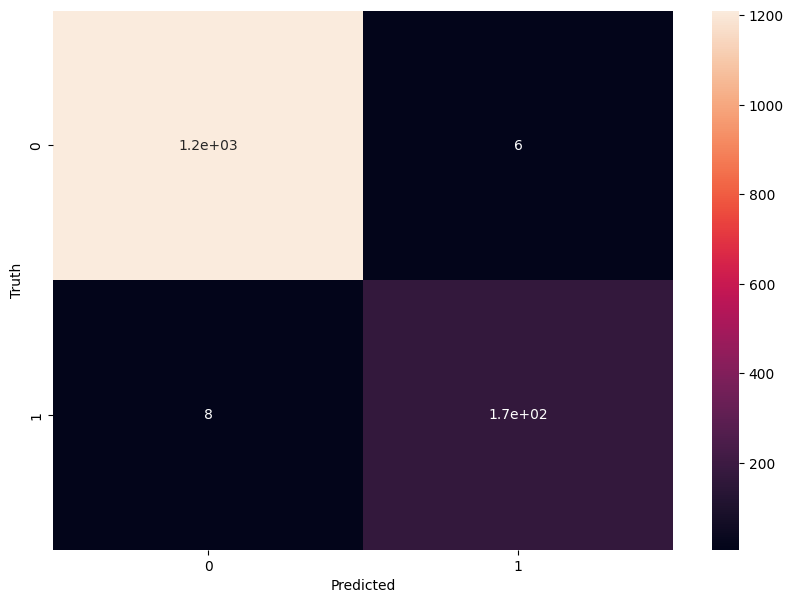

In [25]:
cm = confusion_matrix(y_test,prediction)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
model.predict(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"])

array([1])

In [27]:
model.predict(["To the Moon Sigmund Minisodes are available NOW on consoles!"])

array([0])

In [28]:
model.predict(["Push notifications power a USD 171B industry, Build your app with AI"])

array([0])

In [29]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1216
           1       0.97      0.95      0.96       177

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393



In [39]:
model_params = {
    'SVM': {
        'model': Pipeline([
            ('vectorizer', CountVectorizer()),
            ('clf', SVC(gamma='auto'))
        ]),
        'params': {
            'clf__C': [1, 10, 20],
            'clf__kernel': ['rbf', 'linear']
        }
    },
    'Random Forest': {
        'model': Pipeline([
            ('vectorizer', CountVectorizer()),
            ('clf', RandomForestClassifier())
        ]),
        'params': {
            'clf__n_estimators': [10, 50, 100]
        }
    },
    'Logistic Regression': {
        'model': Pipeline([
            ('vectorizer', CountVectorizer()),
            ('clf', LogisticRegression(solver='liblinear', multi_class='auto'))
        ]),
        'params': {
            'clf__C': [1, 5, 10]
        }
    }
}
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    # Print out each model's best score and parameters
    print(f"Model: {model_name}")
    print(f"Best Score: {clf.best_score_}")
    print(f"Best Parameters: {clf.best_params_}")
    print('-' * 50)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

Model: SVM
Best Score: 0.9820488210182505
Best Parameters: {'clf__C': 1, 'clf__kernel': 'linear'}
--------------------------------------------------
Model: Random Forest
Best Score: 0.9724760049279432
Best Parameters: {'clf__n_estimators': 100}
--------------------------------------------------


C:\Users\ZAIN PC\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ZAIN PC\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ZAIN PC\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ZAIN PC\AppData\Roaming\Python\Python310\site-packages\sklearn\l

Model: Logistic Regression
Best Score: 0.9827670973841791
Best Parameters: {'clf__C': 10}
--------------------------------------------------


C:\Users\ZAIN PC\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
